In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Diwali Sales Data.csv", encoding="latin 1")

In [4]:
df.shape

(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


DATA CLEANING


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#drop unrelated/blank columns

df.drop(['Status', 'unnamed1'], axis=1, inplace = True)

In [8]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
## check for null values

pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [10]:
df.shape

(11251, 13)

In [11]:
## drop null values

df.dropna(inplace=True)

In [12]:
df.shape

(11239, 13)

In [13]:

##changing data type

df['Amount'] = df['Amount'].astype(int)


In [14]:
##to cross-check

df['Amount'].dtypes

dtype('int64')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
##rename column
df.rename(columns={'marital_Status': 'shaadi'}, inplace=True)

In [17]:
##description of the data

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [18]:
## using describe for specific columns

df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**EXPLORATORY DATA ANALYSIS**

*GENDER*

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

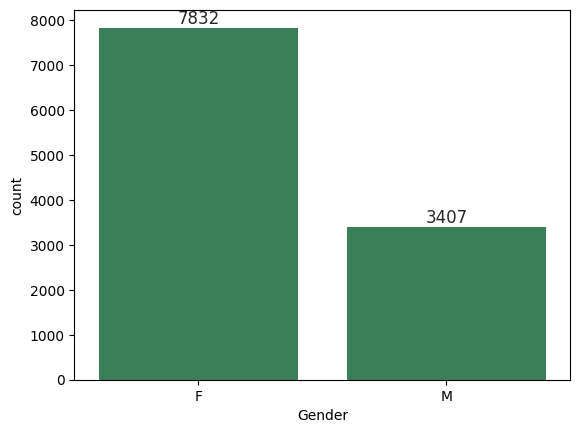

In [20]:
ax = sns.countplot(x="Gender", data=df, color="seagreen")

sns.set(rc={'figure.figsize': (5,3)})
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

*From the above graph we can say that there are majority of women than men*

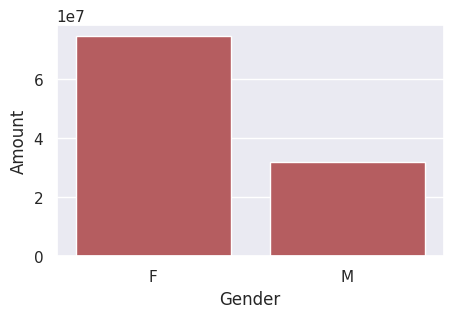

In [21]:
sales_gen= df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x="Gender", y="Amount", data=sales_gen, color="r")
plt.show()

*From above graph we can see that most of the buyers are female and even the purchase power of the females are greater than man*

***AGE***

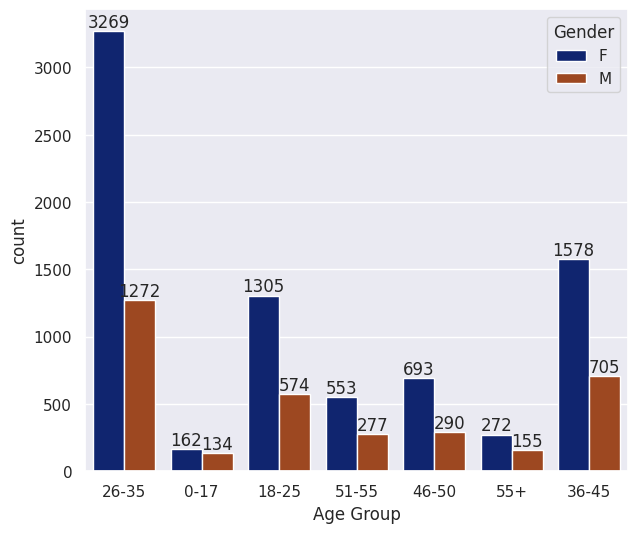

In [37]:
ax= sns.countplot(data= df, x="Age Group", hue= "Gender", palette="dark")
sns.set(rc={'figure.figsize': (6,6)})
for bars in ax.containers:
  ax.bar_label(bars)

*It can be seen clearly that females aged 26-35 are majority ones followed by age group 36-45 years*

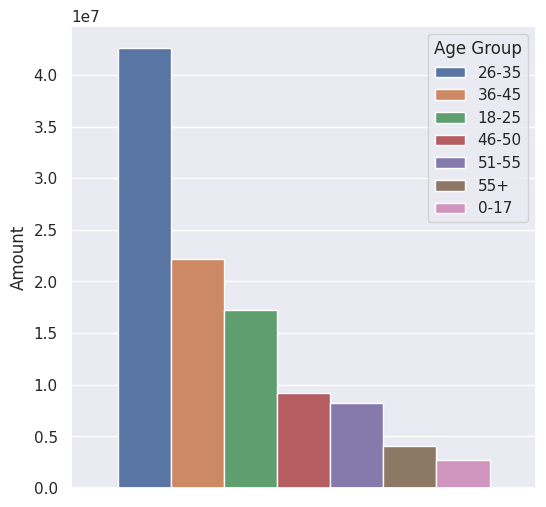

In [23]:
sales_state= df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(hue="Age Group", y="Amount", data=sales_state)
plt.show()

*From above graph we can see that most of the buyers are of age group between 26-35 yrs female*

/tmp/ipython-input-3186433815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State", y="Orders", data=sales_state, palette="muted")


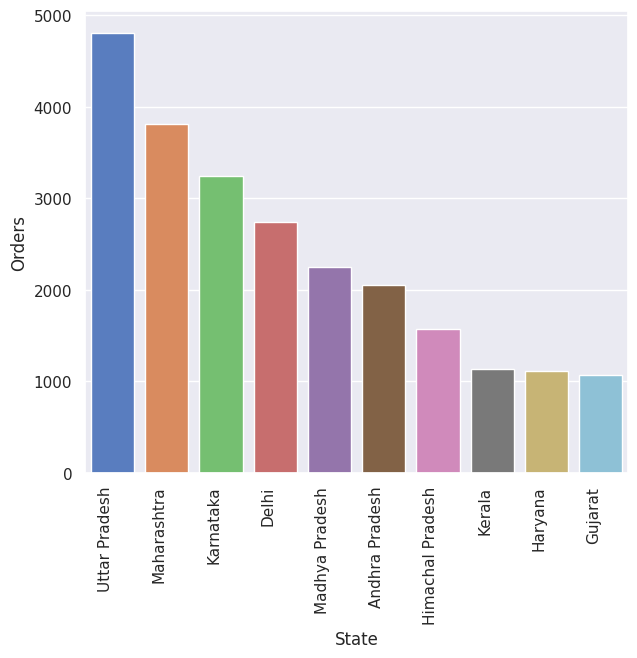

In [42]:
sales_state= df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
sns.set(rc={'figure.figsize': (7,6)})
plt.xticks(rotation=90, ha='right')
sns.barplot(x="State", y="Orders", data=sales_state, palette="muted")
plt.show()

*From the above analysis it can be seen Uttar Pradesh ranks first in case of orders placed followed by Maharashtra and Karnataka*


/tmp/ipython-input-339506239.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State", y="Amount", data=sales_state, palette="dark")


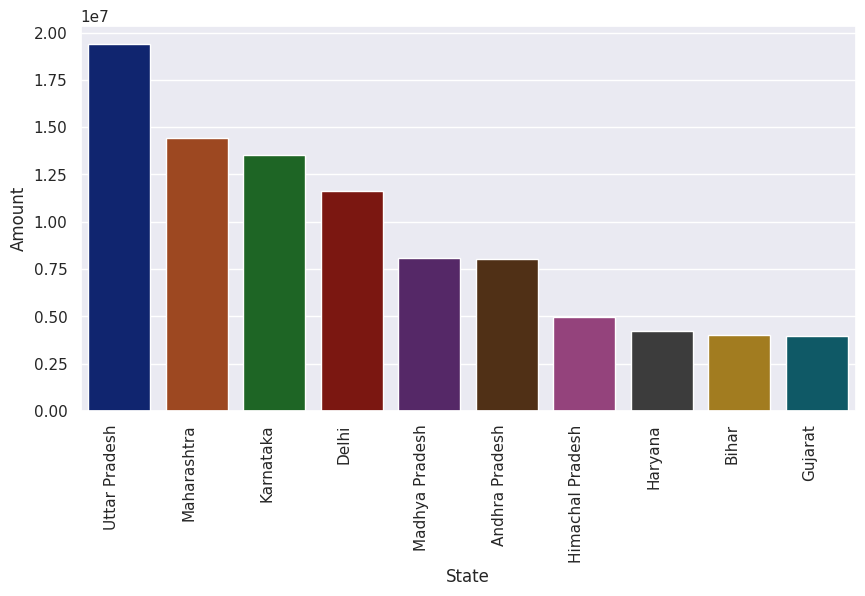

In [25]:
sales_state= df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize': (10,5)})
plt.xticks(rotation=90, ha='right')
sns.barplot(x="State", y="Amount", data=sales_state, palette="dark")
plt.show()

*From above graphs we can see that unexpectedly most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively but total sales/amount is from UP, Karnataka and the Maharashtra**


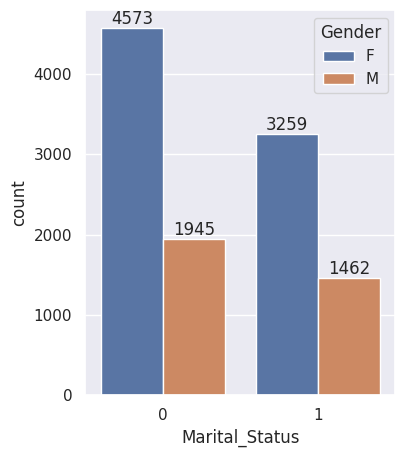

In [49]:
ax= sns.countplot(data=df, x= "Marital_Status",hue="Gender")
sns.set(rc={'figure.figsize': (3,3)})
for bars in ax.containers:
 ax.bar_label(bars)

*There are more married women comparetively*

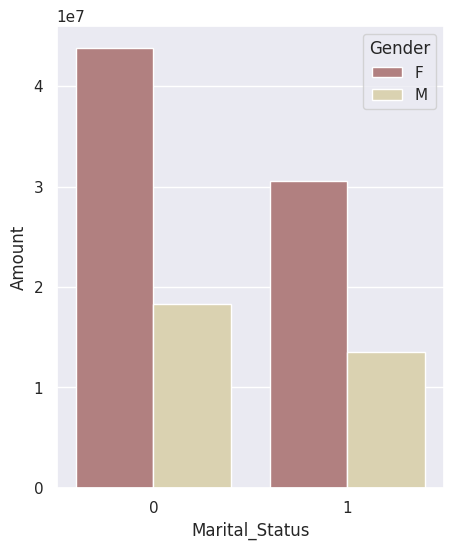

In [58]:
sales_state= df.groupby(["Marital_Status", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize': (5,6)})

sns.barplot(x="Marital_Status", y="Amount", data=sales_state, hue="Gender",palette="pink")
plt.show()

*From the above graph we cann see that most of the buyers are married(women) and they have high purchasing power*

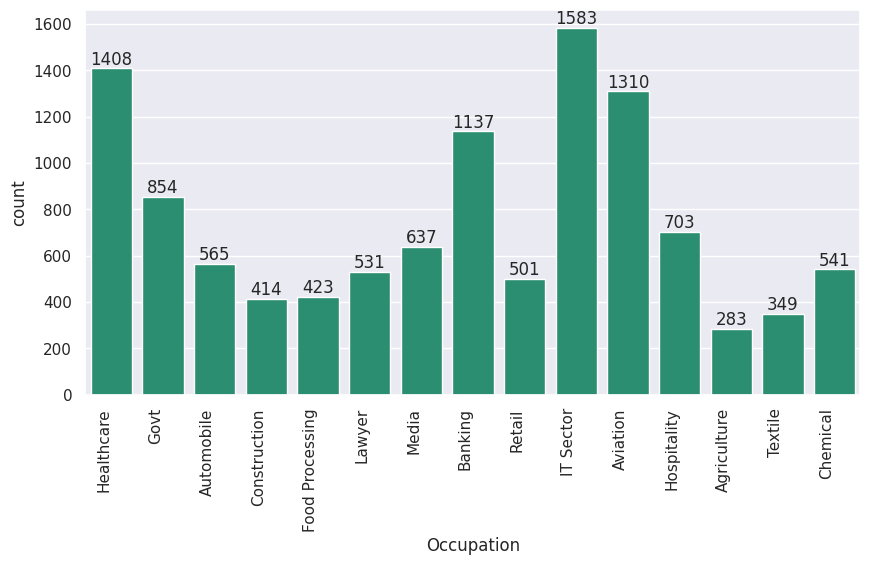

In [28]:
sns.set(rc={'figure.figsize': (10,5)})
sns.set_palette("Dark2")
ax= sns.countplot(data= df, x="Occupation")
plt.xticks(rotation=90, ha='right')
for bars in ax.containers:
   ax.bar_label(bars)

*Most of the people are from IT sector followed by healthcare and aviation*

/tmp/ipython-input-795850932.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Occupation", y="Amount", data=sales_state,palette="dark")


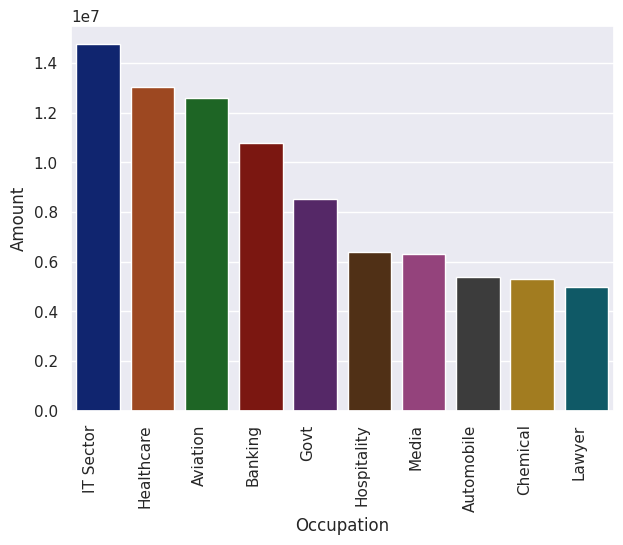

In [62]:
sales_state= df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize': (7,5)})
plt.xticks(rotation=90, ha='right')
sns.barplot(x="Occupation", y="Amount", data=sales_state,palette="dark")
plt.show()

*From the above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation Sector*

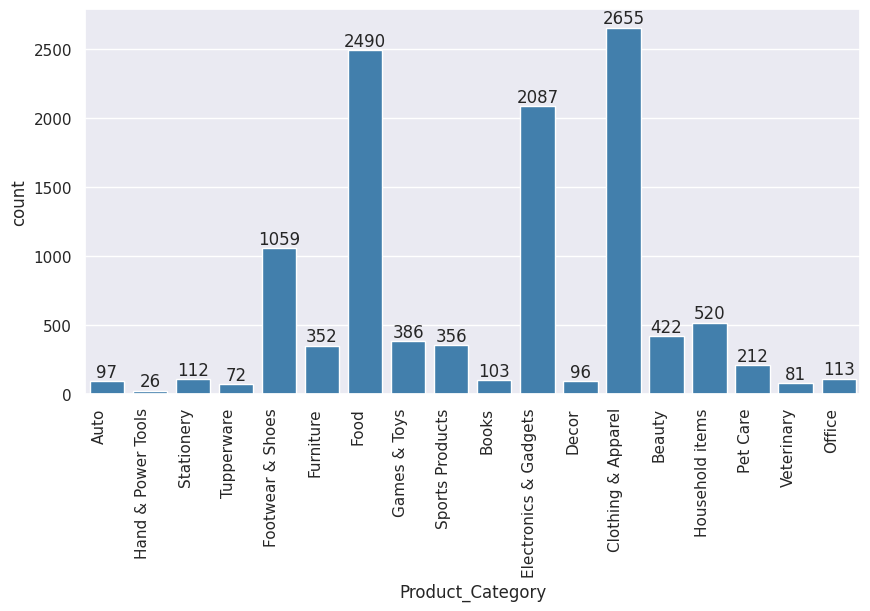

In [30]:
sns.set(rc={'figure.figsize': (10,5)})
sns.set_palette("tab20c")
ax= sns.countplot(data= df, x="Product_Category")
plt.xticks(rotation=90, ha='right')
for bars in ax.containers:
   ax.bar_label(bars)

*Clothing and apparel leads in case of counts, followed by food and economic gadget*

/tmp/ipython-input-3238356315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product_Category", y="Amount", data=sales_state,palette="dark")


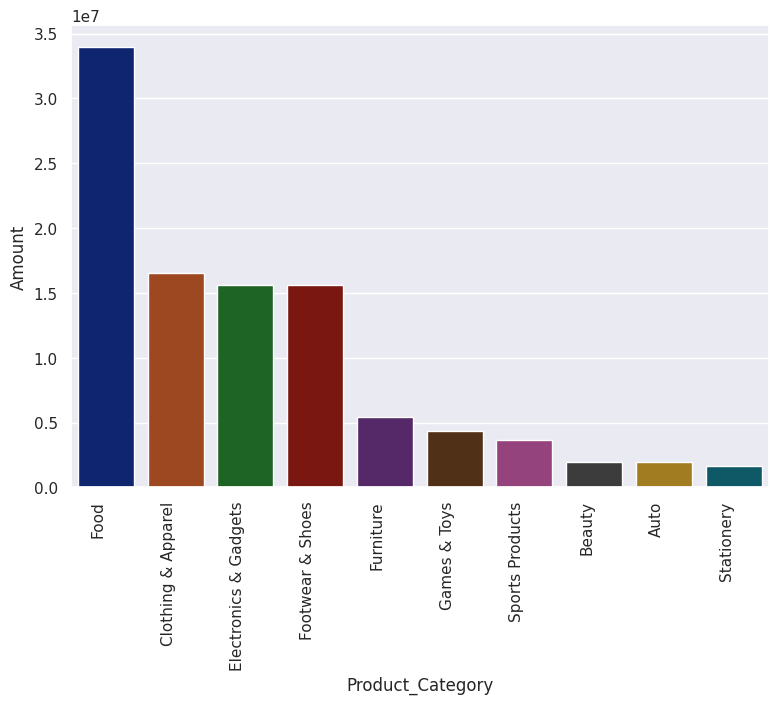

In [66]:
sales_state= df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize': (9,6)})
plt.xticks(rotation=90, ha='right')
sns.barplot(x="Product_Category", y="Amount", data=sales_state,palette="dark")
plt.show()

*From the above graphs we can see that most of the sold products are from food, clothing and electronics category*

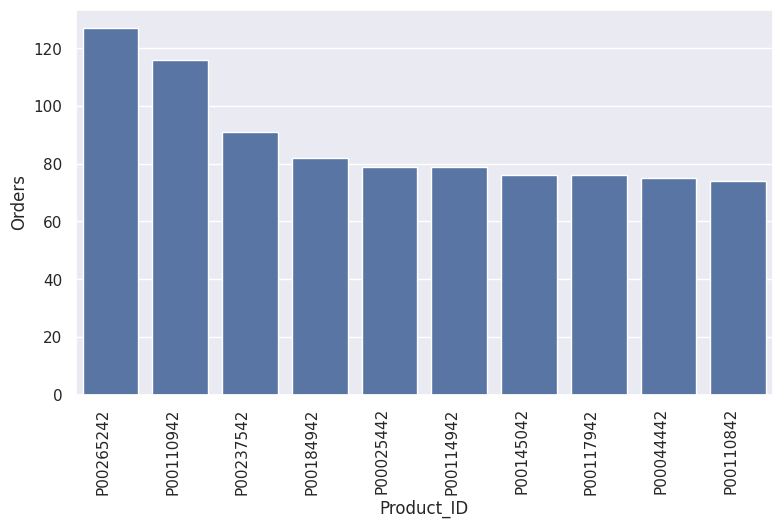

In [72]:
sales_state= df.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
sns.set(rc={'figure.figsize': (9,5)})
plt.xticks(rotation=90, ha='right')
sns.barplot(x="Product_ID", y="Orders", data=sales_state)
plt.show()

**CONCLUSION **

Married women age group 26-35 yrs from UP, Maharashta and Karnataka working in IT, Healthcare abd Aviation are more likely to buy products from food, clothing and electronics category